In [1]:
import pandas as pd
import numpy as np
from constants import *
from os.path import join

data_dir = '../../data'
feature_dir = '..'
bids = pd.read_csv(join(data_dir, 'bids.csv'))
bids_g_bidder = bids.groupby('bidder_id')
bids_g_bidder_auction = bids.groupby(['bidder_id', 'auction'])

In [5]:
print bids.info()
train = pd.read_csv(join(data_dir, 'train.csv'))
print train.info()
labeled_bids = pd.merge(train, bids, left_on='bidder_id', right_on='bidder_id')
print labeled_bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071224 entries, 0 to 3071223
Data columns (total 12 columns):
bidder_id          object
payment_account    object
address            object
outcome            float64
bid_id             int64
auction            object
merchandise        object
device         

9772885210526315 9631916842105263


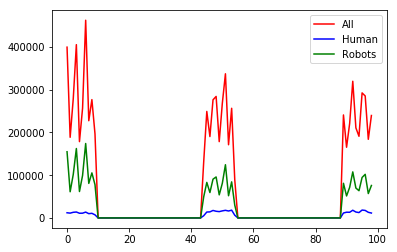

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

print np.max(bids.time), np.min(bids.time)
time_slots = np.linspace(np.min(bids.time), np.max(bids.time)+1, num=100)
bids_time_slots = np.zeros(time_slots.shape[0] - 1)
robots_bits_time_slots = np.zeros(time_slots.shape[0] - 1)
human_bits_time_slots = np.zeros(time_slots.shape[0] - 1)

for i in xrange(bids_time_slots.shape[0]):
    bids_time_slots[i] = np.count_nonzero(np.logical_and(bids.time >= time_slots[i], bids.time < time_slots[i+1]))
    robots_bits_time_slots[i] = np.count_nonzero(np.logical_and(labeled_bids[labeled_bids.outcome==1].time >= time_slots[i], labeled_bids[labeled_bids.outcome==1].time < time_slots[i+1]))
    human_bits_time_slots[i] = np.count_nonzero(np.logical_and(labeled_bids[labeled_bids.outcome==0].time >= time_slots[i], labeled_bids[labeled_bids.outcome==0].time < time_slots[i+1]))
plt.figure()
plt.plot(xrange(bids_time_slots.shape[0]), bids_time_slots, 'r-', label='All')
plt.plot(xrange(bids_time_slots.shape[0]), robots_bits_time_slots, 'b-', label='Robots')
plt.plot(xrange(bids_time_slots.shape[0]), human_bits_time_slots, 'g-', label='Human')
plt.legend()
plt.savefig('time.eps')
plt.show()

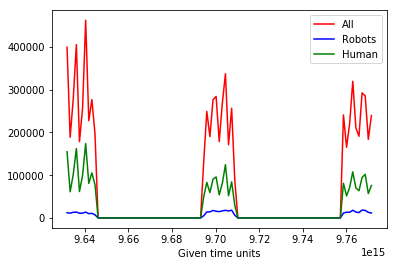

In [16]:
plt.figure()
plt.plot(time_slots[:-1], bids_time_slots, 'r-', label='All')
plt.plot(time_slots[:-1], robots_bits_time_slots, 'b-', label='Robots')
plt.plot(time_slots[:-1], human_bits_time_slots, 'g-', label='Human')
plt.legend()
plt.xlabel('Given time units')
# plt.ylabel('Bids count')
plt.savefig('time_new.eps')
plt.show()

In [2]:
print bids['device'].unique().shape

(7351,)


In [6]:
one_day = 4547368124071.8799
startt = 9631916820392676.0

time_intervals = [startt + one_day * i for i in xrange(32)]
day_total_cnt = []

for i in xrange(len(time_intervals)-1):
    day_total_cnt.append(np.count_nonzero(np.logical_and(bids['time'] >= time_intervals[i], bids['time'] < time_intervals[i+1])))
    print 'day', i, day_total_cnt[-1]
    
print len(day_total_cnt)
    

day 0 938192
day 1 912598
day 2 1021227
day 3 0
day 4 0
day 5 0
day 6 0
day 7 0
day 8 0
day 9 0
day 10 0
day 11 0
day 12 0
day 13 0
day 14 800696
day 15 805851
day 16 826583
day 17 0
day 18 0
day 19 0
day 20 0
day 21 0
day 22 0
day 23 0
day 24 0
day 25 0
day 26 0
day 27 0
day 28 770022
day 29 772038
day 30 809127
31


In [10]:
def generate_half_hr_cnt_features_per_bidder(group):
    half_hr_bds = np.linspace(0.0, one_day, num=49)
    feature = dict()
    for day, day_cnt in enumerate(day_total_cnt):
        if day_cnt > 0:
            for half_hr_idx in xrange(len(half_hr_bds)-1):
                feature['day_'+str(day)+'_half_hr_'+str(half_hr_idx)] = np.count_nonzero(np.logical_and(group['time'] >= time_intervals[day] + half_hr_bds[half_hr_idx], group['time'] < time_intervals[day] + half_hr_bds[half_hr_idx+1]))
    
#     try:
#         assert group.shape[0] == sum(feature.values())
#     except:
#         print group.shape[0], sum(feature.values())
    return pd.Series(feature)
    
half_hr_cnt_feat_per_bidder = bids_g_bidder.apply(generate_half_hr_cnt_features_per_bidder)
half_hr_cnt_feat_per_bidder.to_csv(join(feature_dir, 'half_hr_cnt_feat_per_bidder.csv'))
print half_hr_cnt_feat_per_bidder.info()



NameError: name 'feature_dir' is not defined

In [12]:
feature_dir = '..'
print half_hr_cnt_feat_per_bidder.info()
half_hr_cnt_feat_per_bidder.to_csv(join(feature_dir, 'half_hr_cnt_feat_per_bidder.csv'))

<class 'pandas.core.frame.DataFrame'>
Index: 6614 entries, 001068c415025a009fee375a12cff4fcnht8y to fff2c070d8200e0a09150bd81452ce29ngcnv
Columns: 432 entries, day_0_half_hr_0 to day_30_half_hr_9
dtypes: int64(432)
memory usage: 21.8+ MB
None


In [31]:
print half_hr_cnt_feat_per_bidder.index

Index([u'001068c415025a009fee375a12cff4fcnht8y',
       u'002d229ffb247009810828f648afc2ef593rb',
       u'0030a2dd87ad2733e0873062e4f83954mkj86',
       u'003180b29c6a5f8f1d84a6b7b6f7be57tjj1o',
       u'00486a11dff552c4bd7696265724ff81yeo9v',
       u'0051aef3fdeacdadba664b9b3b07e04e4coc6',
       u'0053b78cde37c4384a20d2da9aa4272aym4pb',
       u'0061edfc5b07ff3d70d693883a38d370oy4fs',
       u'00862324eb508ca5202b6d4e5f1a80fc3t3lp',
       u'009479273c288b1dd096dc3087653499lrx3c',
       ...
       u'ff8a8bcb0ecfd4c8881ab22abeba75a9u4q95',
       u'ff92ea4abd33ed38601287f0e1d6726dmgx1f',
       u'ffa7b0b0f144b1594131d99e50c17a0bwbym3',
       u'ffacbed056cbfaa60c1fcf51f0d381bddr3ly',
       u'ffaf0a972a6dcb3910fd6b16045781e2ava5y',
       u'ffbc0fdfbf19a8a9116b68714138f2902cc13',
       u'ffc4e2dd2cc08249f299cab46ecbfacfobmr3',
       u'ffd29eb307a4c54610dd2d3d212bf3bagmmpl',
       u'ffd62646d600b759a985d45918bd6f0431vmz',
       u'fff2c070d8200e0a09150bd81452ce29ngcnv'],
      dt

In [32]:
old_feat = pd.read_csv('../new_all_feat.csv')
old_feat.drop('Unnamed: 0', axis=1, inplace=True)
print old_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 29 columns):
auctions_won_cnt         6614 non-null float64
price_max                6614 non-null float64
price_mean               6614 non-null float64
price_median             6614 non-null float64
price_min                6614 non-null float64
price_std                6614 non-null float64
tdiff_max                6614 non-null float64
tdiff_mean               6614 non-null float64
tdiff_median             6614 non-null float64
tdiff_min                6614 non-null float64
tdiff_std                6614 non-null float64
tdiff_zeros              6614 non-null float64
response_max             6614 non-null float64
response_mean            6614 non-null float64
response_median          6614 non-null float64
response_min             6614 non-null float64
response_std             6614 non-null float64
auction_cnt              6614 non-null float64
bids_cnt                 6614 non-null float64


In [33]:
new_feat = pd.merge(old_feat, half_hr_cnt_feat_per_bidder, left_on='bidder_id', right_index=True)
print new_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614 entries, 0 to 6613
Columns: 461 entries, auctions_won_cnt to day_30_half_hr_9
dtypes: float64(28), int64(432), object(1)
memory usage: 23.3+ MB
None


In [34]:
country_category = pd.read_csv('../country_category_feat_per_bidder.csv')
print country_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Columns: 211 entries, bidder_id to zz
dtypes: float64(210), object(1)
memory usage: 10.6+ MB
None


In [35]:
new_feat = pd.merge(new_feat, country_category, left_on='bidder_id', right_on='bidder_id')
print new_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614 entries, 0 to 6613
Columns: 671 entries, auctions_won_cnt to zz
dtypes: float64(238), int64(432), object(1)
memory usage: 33.9+ MB
None


In [37]:
new_feat.to_csv('../new_feat_for_dnn.csv')

In [36]:
from constants import *
columns_list = list(new_feat.columns)
clear_list = [item for item in columns_list if item not in categories and item not in countries_list and not item.startswith('day_')]
print len(clear_list), len(categories), len(countries_list)
print clear_list

29 10 200
['auctions_won_cnt', 'price_max', 'price_mean', 'price_median', 'price_min', 'price_std', 'tdiff_max', 'tdiff_mean', 'tdiff_median', 'tdiff_min', 'tdiff_std', 'tdiff_zeros', 'response_max', 'response_mean', 'response_median', 'response_min', 'response_std', 'auction_cnt', 'bids_cnt', 'country_cnt', 'device_cnt', 'ip_cnt', 'mean_bids_per_auction', 'url_cnt', 'tdiff_ip', 'ip_entropy', 'url_entropy', 'bidder_id', 'country_cnt_mean_auc']


In [3]:
import pandas as pd
new_all_feat = pd.read_csv('../new_all_feat.csv')
print list(new_all_feat.columns)

['Unnamed: 0', 'auctions_won_cnt', 'price_max', 'price_mean', 'price_median', 'price_min', 'price_std', 'tdiff_max', 'tdiff_mean', 'tdiff_median', 'tdiff_min', 'tdiff_std', 'tdiff_zeros', 'response_max', 'response_mean', 'response_median', 'response_min', 'response_std', 'auction_cnt', 'bids_cnt', 'country_cnt', 'device_cnt', 'ip_cnt', 'mean_bids_per_auction', 'url_cnt', 'tdiff_ip', 'ip_entropy', 'url_entropy', 'bidder_id', 'country_cnt_mean_auc']


In [2]:
from constants import *
print len(categories), len(countries_list) - 2

10 198
